# Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline

### Read raw test data

In [2]:
amazon = pd.read_csv('/Users/juandherrera/Google Drive/017_Machine Learning/ml/Assignment 1/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [3]:
# print(amazon.loc[0, "Text"])

In [4]:
# print(amazon.head())
# print(amazon['helpful'].mean())

### Feature extraction on natural language data

In [5]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()

# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())
# vectorizer = joblib.load('vectorizer.pkl')
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.transform(corpus)

In [6]:
# vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
hv = joblib.load('hv.pkl')
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)

/Users/juandherrera/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(91000, 131072)


In [7]:
# vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
hv = joblib.load('hv.pkl')
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)

/Users/juandherrera/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(91000, 131072)


In [8]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [9]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Create additional quantitative features

In [10]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()

X_quant_features = amazon[["Score", "reviewLen"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   Score  reviewLen
0      5        126
1      5        339
2      5        213
3      5        437
4      5        144
5      5        227
6      5        343
7      5        183
8      4        274
9      5        334
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [11]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(91000, 131074)


### Create `X`, scaled matrix of features

In [12]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(91000, 131074)


### create `y`, vector of Labels

In [13]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

In [14]:
# MODEL: ordinary least squares
# from sklearn import linear_model
# ols = linear_model.SGDClassifier(loss="squared_loss")
# ols.fit(X, y)
# joblib.dump(ols, 'ols.pkl') # pickle
ols = joblib.load('ols.pkl') # pickle

ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
ols_performance.compute_measures()
print(ols_performance.performance_measures)

{'Pos': 6601, 'Neg': 84399, 'TP': 3145, 'TN': 43789, 'FP': 40610, 'FN': 3456, 'Accuracy': 0.5157582417582418, 'Precision': 0.07187749971431837, 'Recall': 0.4764429631873959, 'desc': 'ols'}


In [15]:
# # MODEL: SVM, linear
# # from sklearn import linear_model
# # svm = linear_model.SGDClassifier()
# # svm.fit(X, y)
# # joblib.dump(svm, 'svm.pkl') # pickle
# svm = joblib.load('svm.pkl') # pickle

# svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
# svm_performance.compute_measures()
# print(svm_performance.performance_measures)

In [16]:
# MODEL: logistic regression
# from sklearn import linear_model
# lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
# lgs.fit(X, y)
# joblib.dump(lgs, 'lgs.pkl') # pickle
lgs = joblib.load('lgs.pkl')

lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 6601, 'Neg': 84399, 'TP': 1308, 'TN': 82069, 'FP': 2330, 'FN': 5293, 'Accuracy': 0.9162307692307692, 'Precision': 0.3595382078064871, 'Recall': 0.1981517951825481, 'desc': 'lgs'}


In [17]:
# MODEL: Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle
# nbs = joblib.load('nbs.pkl')

# nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
# nbs_performance.compute_measures()
# print(nbs_performance.performance_measures)

In [18]:
# MODEL: Perceptron
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X, y)
# joblib.dump(prc, 'prc.pkl') # pickle
# prc = joblib.load('prc.pkl')

# prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
# prc_performance.compute_measures()
# print(prc_performance.performance_measures)

In [19]:
# MODEL: Ridge Regression Classifier
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier()
# rdg.fit(X, y)
# joblib.dump(rdg, 'rdg.pkl') # pickle
rdg = joblib.load('rdg.pkl')

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 6601, 'Neg': 84399, 'TP': 979, 'TN': 82955, 'FP': 1444, 'FN': 5622, 'Accuracy': 0.9223516483516484, 'Precision': 0.40404457284358236, 'Recall': 0.14831086199060747, 'desc': 'rdg'}


In [39]:
# MODEL: Decision Tree Classifier
# from sklearn import tree
# dtc = tree.DecisionTreeClassifier(max_depth=100)
# dtc.fit(X_matrix, y)
# joblib.dump(dtc, 'dtc.pkl') # pickle
dtc = joblib.load('dtc.pkl')

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 6601, 'Neg': 84399, 'TP': 2503, 'TN': 80394, 'FP': 4005, 'FN': 4098, 'Accuracy': 0.9109560439560439, 'Precision': 0.3846035648432698, 'Recall': 0.37918497197394335, 'desc': 'dtc'}


In [21]:
rf = joblib.load('rf.pkl')

rf_performance = BinaryClassificationPerformance(rf.predict(X_matrix), y, 'rf')
rf_performance.compute_measures()
print(rf_performance.performance_measures)

{'Pos': 6601, 'Neg': 84399, 'TP': 895, 'TN': 84393, 'FP': 6, 'FN': 5706, 'Accuracy': 0.9372307692307692, 'Precision': 0.9933407325194229, 'Recall': 0.1355855173458567, 'desc': 'rf'}


### ROC plot to compare performance of various models and fits

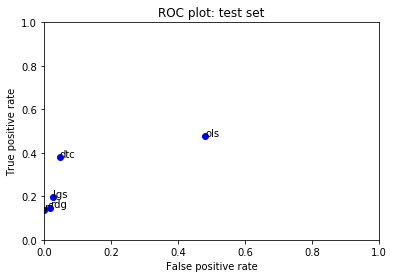

In [40]:
fits = [lgs_performance, rdg_performance, ols_performance, dtc_performance, rf_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [23]:
# amazon.loc[0, "Text"]

In [24]:
# amazon.loc[0, "helpful"]

In [25]:
# ridge_predictions = rdg.predict(X)

In [26]:
# ridge_predictions.shape

In [27]:
# print(ridge_predictions)

In [28]:
# false positives

# import random, time

# for i in range(0, len(ridge_predictions)):
#     if (ridge_predictions[i] == True):
#         if (amazon.loc[i, "helpful"] == False):
#             if (random.uniform(0, 1) < 0.05):
#                 print(i)
#                 print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
#                 print(amazon.loc[i, "Score"])
#                 print(amazon.loc[i, "HelpfulnessDenominator"])
#                 print(amazon.loc[i, "ProductId"])
#                 print(amazon.loc[i, "Text"])
#                 print('* * * * * * * * * ')